In [4]:
import numpy as np
import math

np.__version__

'2.0.0'

In [5]:
class TicTacToe:
    def __init__(self, size=3):
        # square shape
        self.row_count    = size
        self.column_count = size

        self.action_size = self.row_count * self.column_count

    def get_initial_state(self):
        return np.zeros((self.row_count, self.column_count), dtype=np.int8)

    # internal helper
    def action_to_row_col(self, action):
        """turn action number into row and column"""
        row    = action // self.column_count
        column = action  % self.column_count

        return row, column

    def get_next_state(self, state, action, player):
        row, column = self.action_to_row_col(action)
        
        state[row, column] = player
        return state

    def get_valid_moves(self, state):
        return (state.reshape(-1) == 0).astype(np.uint8)

    def check_win(self, state, action):
        if action == None:
            return False

        row, column = self.action_to_row_col(action)
        # infer the player from the state
        player = state[row, column]

        return (
            np.sum(state[row, :])       == player * self.column_count
            or np.sum(state[:, column]) == player * self.row_count
            or np.sum(np.diag(state))   == player * self.row_count # TODO: this only makes sense for square... why do we track column and row count separately?
            or np.sum(np.diag(np.fliplr(state))) == player * self.row_count
        )
    
    def check_value_and_terminated(self, state, action):
        if self.check_win(state, action):
            return 1, True
        elif np.sum(self.get_valid_moves(state)) == 0:
            return 0, True
        else:
            return 0, False
        
    def get_opponent(self, player):
        return -player

    def get_opponent_value(self, value):
        return -value


In [6]:
tictactoe = TicTacToe()
player = 1

state = tictactoe.get_initial_state()

In [7]:
state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [8]:
tictactoe.get_valid_moves(state)

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [9]:
player = 1
action = 4
state = tictactoe.get_next_state(state, action, player)
print(state)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


In [10]:
tictactoe.get_valid_moves(state)

array([1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [22]:
# let's play TicTacToe, we'll provide the input for each player as we go until the game is over, then print the results at the end
tictactoe = TicTacToe()
state = tictactoe.get_initial_state()
player = -1
while True:
    print(state)
    valid_moves = tictactoe.get_valid_moves(state)
    print(f"Player {player}'s available moves: {[i for i in range(len(valid_moves)) if valid_moves[i] == 1]}")
    try:
        action = int(input(f"Player {player} enter your move (0-8): "))
    except ValueError:
        print("Invalid input, please enter a number between 0 and 8.")
        continue
    if valid_moves[action] != 1:
        print("Invalid move, try again.")
        continue
    state = tictactoe.get_next_state(state, action, player)
    value, terminated = tictactoe.check_value_and_terminated(state, action)
    if terminated:
        if value == 0:
            print("It's a draw!")
        else:
            print(f"Player {player} wins!")
        print(state)
        break
    player = tictactoe.get_opponent(player)


[[0 0 0]
 [0 0 0]
 [0 0 0]]
Player -1's available moves: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[[-1  0  0]
 [ 0  0  0]
 [ 0  0  0]]
Player 1's available moves: [1, 2, 3, 4, 5, 6, 7, 8]
[[-1  1  0]
 [ 0  0  0]
 [ 0  0  0]]
Player -1's available moves: [2, 3, 4, 5, 6, 7, 8]
[[-1  1  0]
 [-1  0  0]
 [ 0  0  0]]
Player 1's available moves: [2, 4, 5, 6, 7, 8]
[[-1  1  0]
 [-1  0  1]
 [ 0  0  0]]
Player -1's available moves: [2, 4, 6, 7, 8]
[[-1  1  0]
 [-1  0  1]
 [ 0 -1  0]]
Player 1's available moves: [2, 4, 6, 8]
[[-1  1  0]
 [-1  0  1]
 [ 1 -1  0]]
Player -1's available moves: [2, 4, 8]
Invalid input, please enter a number between 0 and 8.
[[-1  1  0]
 [-1  0  1]
 [ 1 -1  0]]
Player -1's available moves: [2, 4, 8]
[[-1  1 -1]
 [-1  0  1]
 [ 1 -1  0]]
Player 1's available moves: [4, 8]
[[-1  1 -1]
 [-1  1  1]
 [ 1 -1  0]]
Player -1's available moves: [8]
It's a draw!
[[-1  1 -1]
 [-1  1  1]
 [ 1 -1 -1]]


In [35]:
# %pip install matplotlib

from mcts_classic import MCTS
from tictactoe import TicTacToe
import matplotlib.pyplot as plt

def plot_array(array, title):
    plt.figure(figsize=(5, 2))
    plt.bar(range(len(array)), array)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(title)
    plt.show()

Search #1: [0.0748 0.0531 0.0838 0.0371 0.5299 0.0408 0.0527 0.03   0.0978]


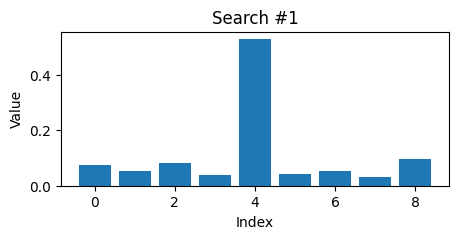

Search #2: [0.064  0.0273 0.0621 0.0399 0.574  0.0391 0.0905 0.0341 0.069 ]


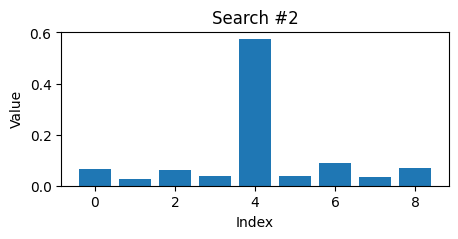

Search #3: [0.0601 0.0412 0.0828 0.0429 0.5123 0.0344 0.0919 0.0407 0.0937]


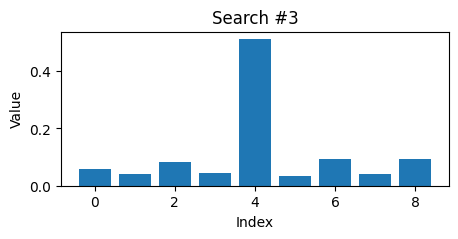

In [36]:
# %pip install matplotlib

from mcts_classic import MCTS
from tictactoe import TicTacToe

for i in range(3):
    # Define game
    game = TicTacToe()
    state = game.get_initial_state()

    # Run MCTS
    mcts = MCTS(game, {'num_searches': 10000, 'C': 1.4})
    action_probs = mcts.search(state)
    print(f"Search #{i+1}: {action_probs}")
    # Plot the array
    plot_array(action_probs, f"Search #{i+1}")

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


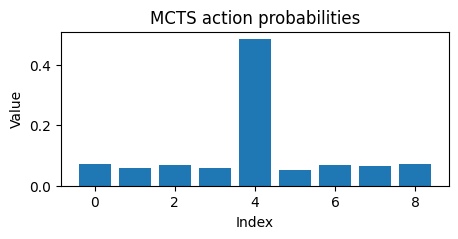

valid_moves [0, 1, 2, 3, 4, 5, 6, 7, 8]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


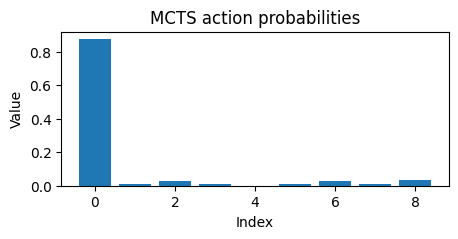

[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


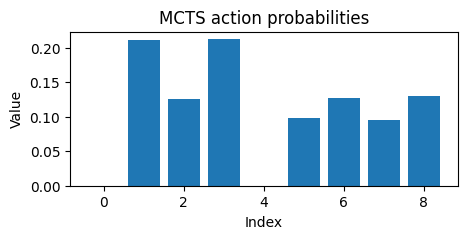

valid_moves [1, 2, 3, 5, 6, 7, 8]
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


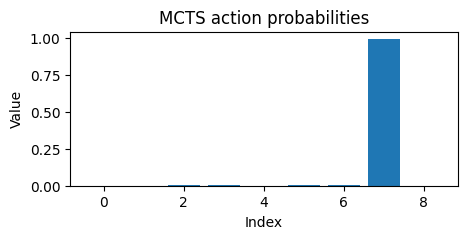

[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0. -1.  0.]]


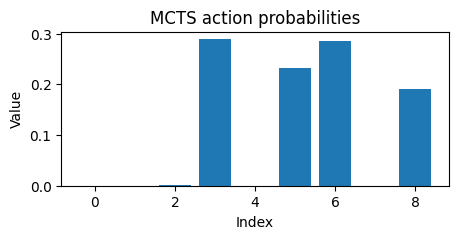

valid_moves [2, 3, 5, 6, 8]
[[-1.  1.  1.]
 [ 0.  1.  0.]
 [ 0. -1.  0.]]


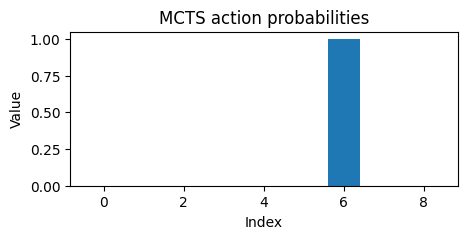

[[-1.  1.  1.]
 [ 0.  1.  0.]
 [-1. -1.  0.]]


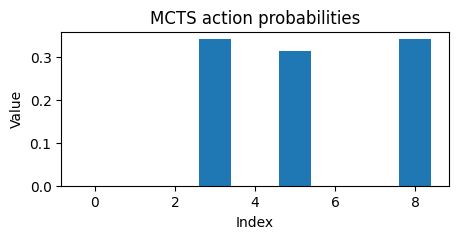

valid_moves [3, 5, 8]
[[-1.  1.  1.]
 [ 1.  1.  0.]
 [-1. -1.  0.]]


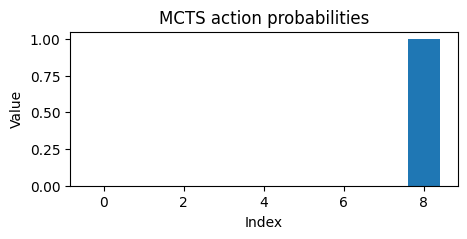

[[-1.  1.  1.]
 [ 1.  1.  0.]
 [-1. -1. -1.]]
-1 won


In [39]:
tictactoe = TicTacToe()
player = 1

args = {
    'C': 1.41,
    'num_searches': 100000
}

mcts = MCTS(tictactoe, args)

state = tictactoe.get_initial_state()


while True:
    print(state)
    neutral_state = tictactoe.change_perspective(state, player)
    mcts_probs = mcts.search(neutral_state)
    plot_array(mcts_probs, "MCTS action probabilities")

    if player == 1:
        valid_moves = tictactoe.get_valid_moves(state)
        print("valid_moves", [i for i in range(tictactoe.action_size) if valid_moves[i] == 1])
        try:
            action = int(input(f"Player {player} enter your move (0-8): "))
        except ValueError:
            print("Invalid input, please enter a number between 0 and 8.")
            continue
        if valid_moves[action] != 1:
            print("Invalid move, try again.")
            continue            
    else:
        action = np.argmax(mcts_probs)
        
    state = tictactoe.get_next_state(state, action, player)
    
    value, is_terminal = tictactoe.get_value_and_terminated(state, action)
    
    if is_terminal:
        print(state)
        if value == 1:
            print(player, "won")
        else:
            print("draw")
        break
        
    player = tictactoe.get_opponent(player)